In [1]:
%load_ext autoreload

In [403]:
%reload_ext autoreload

# MODULE IMPORTS ----
# warning settings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data management
import pandas as pd
import numpy as np
import pickle

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Stats functionality
from statsmodels.distributions.empirical_distribution import ECDF

from kabuki.analyze import _parents_to_random_posterior_sample

# HDDM
import hddm
from hddm.model_config import model_config

In [2]:
def pretty_tag(tag):
    return tag[0] if len(tag) == 1 else ', '.join(str(tag))

In [ ]:
def _parents_to_random_posterior_sample(bottom_node, pos=None):
    """Walks through parents and sets them to pos sample."""
    for i, parent in enumerate(bottom_node.extended_parents):
        if not isinstance(parent, pm.Node): # Skip non-stochastic nodes
            continue

        if pos is None:
            # Set to random posterior position
            pos = np.random.randint(0, len(parent.trace()))

        assert len(parent.trace()) >= pos, "pos larger than posterior sample size"
        parent.value = parent.trace()[pos]

In [45]:
data

,rt,response,subj_idx,c_one,v,a,z,t,theta
0,1.799539,1.0,0,low,1.117238,1.471433,0.487230,0.687543,0.679844
1,1.078542,1.0,0,low,1.117238,1.471433,0.487230,0.687543,0.679844
2,0.930544,1.0,0,low,1.117238,1.471433,0.487230,0.687543,0.679844
3,1.270539,0.0,0,low,1.117238,1.471433,0.487230,0.687543,0.679844
4,1.340539,1.0,0,low,1.117238,1.471433,0.487230,0.687543,0.679844
...,...,...,...,...,...,...,...,...,...
4495,2.242012,1.0,2,high,0.978704,1.232316,0.495131,1.625016,0.680101
4496,1.869016,1.0,2,high,0.978704,1.232316,0.495131,1.625016,0.680101
4497,1.938016,1.0,2,high,0.978704,1.232316,0.495131,1.625016,0.680101
4498,2.351010,1.0,2,high,0.978704,1.232316,0.495131,1.625016,0.680101


In [147]:
from kabuki.analyze import _parents_to_random_posterior_sample
#import ipdb
def data_processor(x = None):
    #print(x[:, 0] * x[:, 1])
    return x[:, 0] * x[:, 1]

plot_from_data(data, generative_model = 'angle', plot_func = _plot_posterior_node_from_sim, groupby = ['subj_idx', 'c_one'],
               figsize = (10, 10),
               value_range = (-5, 3.5), samples = 100,
               **{'data_processor': data_processor, 
                             'bin_size': 0.1,
                             'drop_posterior_uncertainty': False,
                             'alpha': 1.0,
                             'plot_type': 'step',
                             'linewidth': 2,
                             'legend_fontsize': 8,
                             'legend_shadow': True,
                             'legend_position': 'upper right'})

9
1
('0', 'high')
subj_idx(0)_c_one(high)
flip
True
2
('0', 'low')
subj_idx(0)_c_one(low)
flip
True
3
('0', 'medium')
subj_idx(0)_c_one(medium)
flip
True
4
('1', 'high')
subj_idx(1)_c_one(high)
flip
True
5
('1', 'low')
subj_idx(1)_c_one(low)
flip
True
6
('1', 'medium')
subj_idx(1)_c_one(medium)
flip
True
7
('2', 'high')
subj_idx(2)_c_one(high)
flip
True
8
('2', 'low')
subj_idx(2)_c_one(low)
flip
True
9
('2', 'medium')
subj_idx(2)_c_one(medium)
flip
True


In [133]:
data

,rt,response,subj_idx,c_one,v,a,z,t,theta
0,1.799539,1.0,0,low,1.117238,1.471433,0.487230,0.687543,0.679844
1,1.078542,1.0,0,low,1.117238,1.471433,0.487230,0.687543,0.679844
2,0.930544,1.0,0,low,1.117238,1.471433,0.487230,0.687543,0.679844
3,1.270539,0.0,0,low,1.117238,1.471433,0.487230,0.687543,0.679844
4,1.340539,1.0,0,low,1.117238,1.471433,0.487230,0.687543,0.679844
...,...,...,...,...,...,...,...,...,...
4495,2.242012,1.0,2,high,0.978704,1.232316,0.495131,1.625016,0.680101
4496,1.869016,1.0,2,high,0.978704,1.232316,0.495131,1.625016,0.680101
4497,1.938016,1.0,2,high,0.978704,1.232316,0.495131,1.625016,0.680101
4498,2.351010,1.0,2,high,0.978704,1.232316,0.495131,1.625016,0.680101


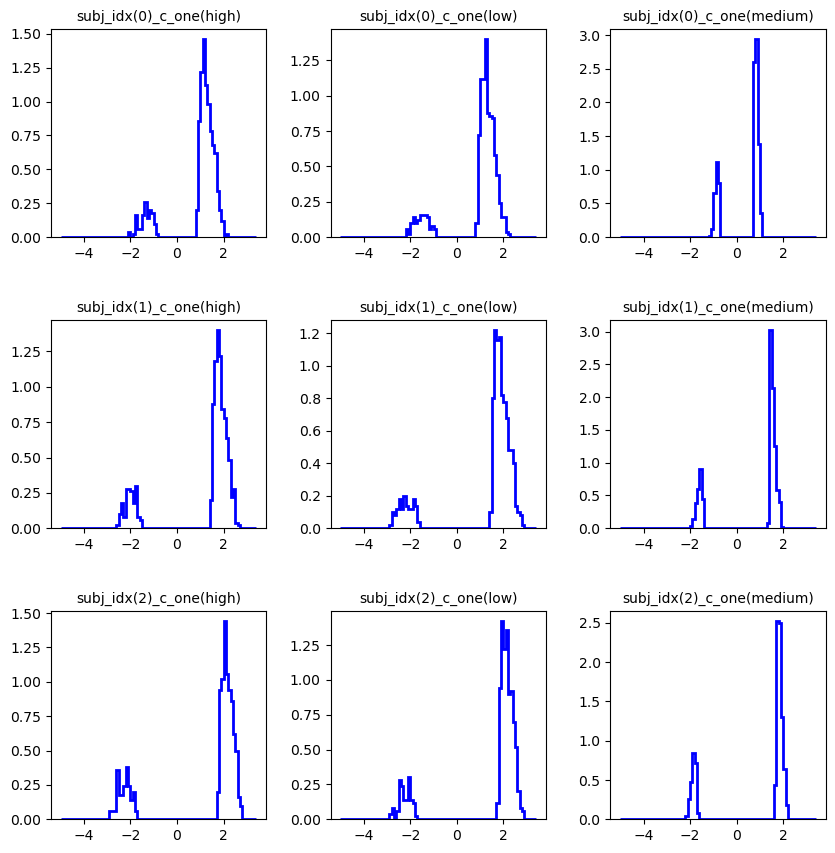

In [148]:
plt.show()

In [119]:
from kabuki.analyze import _parents_to_random_posterior_sample
#import ipdb
def data_processor(x = None):
    #print(x[:, 0] * x[:, 1])
    return x[:, 0] * x[:, 1]

plot_from_data(data, generative_model = 'angle', plot_func = _model_plot_2, groupby = ['subj_idx', 'c_one'],
               figsize = (10, 10),
               value_range = (-5, 3.5), samples = 100,
               **{'data_processor': data_processor, 
                             'bin_size': 0.1,
                             'drop_posterior_uncertainty': False,
                             'alpha': 1.0,
                             'plot_type': 'step',
                             'linewidth': 2,
                             'legend_fontsize': 8,
                             'legend_shadow': True,
                             'legend_position': 'upper right'})

9
1
('0', 'high')
subj_idx(0)_c_one(high)
<class 'pandas.core.frame.DataFrame'>
True
2
('0', 'low')
subj_idx(0)_c_one(low)
<class 'pandas.core.frame.DataFrame'>
False
3
('0', 'medium')
subj_idx(0)_c_one(medium)
<class 'pandas.core.frame.DataFrame'>
False
4
('1', 'high')
subj_idx(1)_c_one(high)
<class 'pandas.core.frame.DataFrame'>
False
5
('1', 'low')
subj_idx(1)_c_one(low)
<class 'pandas.core.frame.DataFrame'>
False
6
('1', 'medium')
subj_idx(1)_c_one(medium)
<class 'pandas.core.frame.DataFrame'>
False
7
('2', 'high')
subj_idx(2)_c_one(high)
<class 'pandas.core.frame.DataFrame'>
False
8
('2', 'low')
subj_idx(2)_c_one(low)
<class 'pandas.core.frame.DataFrame'>
False
9
('2', 'medium')
subj_idx(2)_c_one(medium)
<class 'pandas.core.frame.DataFrame'>
False


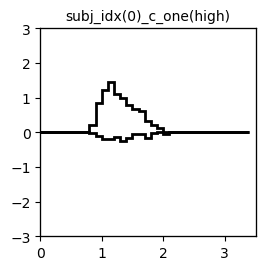

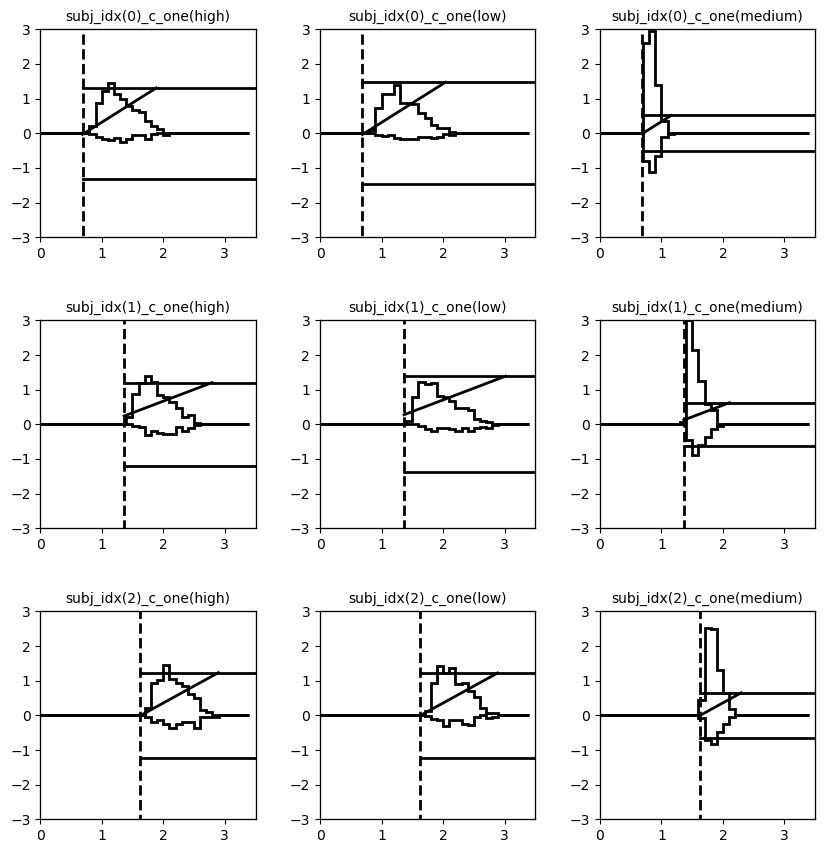

In [120]:
plt.show()

In [ ]:
def plot_posterior_pair(model, plot_func=None, columns=None, save=False, path=None,
                              figsize=(8,6), format='png', samples = 100, **kwargs):
    """Generate posterior pair plots for each observed node.

    :Arguments:

        model : kabuki.Hierarchical
            The (constructed and sampled) kabuki hierarchical model to
            create the posterior preditive from.

    :Optional:

        samples : int (default=10)
            How many posterior samples to use.

        columns : int (default=3)
            How many columns to use for plotting the subjects.

        bins : int (default=100)
            How many bins to compute the data histogram over.

        figsize : (int, int) (default=(8, 6))

        save : bool (default=False)
            Whether to save the figure to a file.

        path : str (default=None)
            Save figure into directory prefix

        format : str or list of strings
            Save figure to a image file of type 'format'. If more then one format is
            given, multiple files are created

        plot_func : function (default=_plot_posterior_pdf_node)
            Plotting function to use for each observed node
            (see default function for an example).
        
    :Note:

        This function changes the current value and logp of the nodes.

    """
    if plot_func is None:
        plot_func = _pair_plot_func

    observeds = model.get_observeds()
    
    kwargs['figsize'] = figsize
    kwargs['n_samples'] = samples
    
    # Plot different conditions (new figure for each)
    for tag, nodes in observeds.groupby('tag'):
        # Plot individual subjects (if present)
        for subj_i, (node_name, bottom_node) in enumerate(nodes.iterrows()):
            if not hasattr(bottom_node['node'], required_method):
                continue # skip nodes that do not define the required_method

            if 'subj_idx' in bottom_node:
                kwargs['title'] = str(bottom_node['subj_idx'])

            g = plot_func(bottom_node['node'], **kwargs)
            plt.show()
                
            # Save figure if necessary
            if save:
                print('passing_print')
                if len(tag) == 0:
                    fname = 'ppq_subject_' + str(subj_i)
                else:
                    fname = 'ppq_' + '.'.join(tag) + '_subject_' + str(subj_i)
                    
                if path is None:
                    path = '.'
                if isinstance(format, str):
                    format = [format]
                print(['%s.%s' % (os.path.join(path, fname), x) for x in format])
                [g.fig.savefig('%s.%s' % (os.path.join(path, fname), x), format=x) for x in format]

In [138]:
def plot_from_data(df, generative_model = 'ddm_vanilla', plot_func=None, columns=None, 
                   save=False, path=None, groupby = 'subj_idx',
                   figsize=(8,6), format='png', **kwargs):
    """Plot data from a hddm ready DataFrame.

    :Arguments:

        model : kabuki.Hierarchical
            The (constructed and sampled) kabuki hierarchical model to
            create the posterior preditive from.

        value_range : numpy.ndarray
            Array to evaluate the likelihood over.

    :Optional:
        columns : int (default=3)
            How many columns to use for plotting the subjects.

        bins : int (default=100)
            How many bins to compute the data histogram over.

        figsize : (int, int) (default=(8, 6))

        save : bool (default=False)
            Whether to save the figure to a file.

        path : str (default=None)
            Save figure into directory prefix

        format : str or list of strings
            Save figure to a image file of type 'format'. If more then one format is
            given, multiple files are created

        plot_func : function (default=_plot_posterior_pdf_node)
            Plotting function to use for each observed node
            (see default function for an example).
        
    :Note:
        This function changes the current value and logp of the nodes.
    """
    
    kwargs['model_'] = generative_model
    title_ = kwargs.pop('title', '')
    ax_title_size = kwargs.pop('ax_title_fontsize', 10)
    
    # Turn
    if model_config[generative_model]['n_choices'] == 2:
        df.loc[df.response == 0, 'response'] = -1
        df.loc[df.rt < 0, 'rt'] = np.abs(df[df.rt < 0].rt.values)
        
    if plot_func is None:
        plot_func = _plot_posterior_pdf_node

    if columns is None:
        # If there are less than 3 items to plot per figure,
        # only use as many columns as there are items.
        max_items = max([len(i[1]) for i in
                         df.groupby(groupby).groups.items()])
        columns = min(3, max_items)
          
    n_plots = len(df.groupby(groupby))
    
    # Plot different conditions (new figure for each)
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title_, fontsize=12)
    fig.subplots_adjust(top=0.9, hspace=.4, wspace=.3)

    i = 1
    for group_id, df_tmp in data.groupby(groupby):
        nrows = np.ceil(n_plots / columns)
        
        # Plot individual subjects (if present)
        ax = fig.add_subplot(np.ceil(nrows), columns, i)

        # Allow kwargs to pass to the plot_func, whether this is the first plot
        # (useful to generate legends only for the first subplot)
        if i == 1:
            kwargs['add_legend'] = True
        else:
            kwargs['add_legend'] = False
        
        # Make axis title
        tag = ''
        for j in range(len(groupby)):
            tag += groupby[j] + '(' + str(group_id[j]) + ')'
            if j < (len(groupby) - 1):
                tag += '_'
        print(tag)
        
        ax.set_title(tag, fontsize = ax_title_size)   
        
        # Call plot function on ax
        # This function should manipulate the ax object, and is expected to not return anything.
        plot_func(df_tmp, ax, **kwargs)
        i += 1
        
        # Save figure if necessary
        if save:
            fname = 'ppq_' + tag
            if path is None:
                path = '.'
            if isinstance(format, str):
                format = [format]
            [fig.savefig('%s.%s' % (os.path.join(path, fname), x), format=x) for x in format]

In [20]:
def plot_posterior_predictive(model, plot_func=None, required_method='pdf', columns=None, save=False, path=None,
                              figsize=(8,6), format='png', num_subjs=None, **kwargs):
    """Plot the posterior predictive distribution of a kabuki hierarchical model.

    :Arguments:

        model : kabuki.Hierarchical
            The (constructed and sampled) kabuki hierarchical model to
            create the posterior preditive from.

        value_range : numpy.ndarray
            Array to evaluate the likelihood over.

    :Optional:

        samples : int (default=10)
            How many posterior samples to generate the posterior predictive over.

        columns : int (default=3)
            How many columns to use for plotting the subjects.

        bins : int (default=100)
            How many bins to compute the data histogram over.

        figsize : (int, int) (default=(8, 6))

        save : bool (default=False)
            Whether to save the figure to a file.

        path : str (default=None)
            Save figure into directory prefix

        format : str or list of strings
            Save figure to a image file of type 'format'. If more then one format is
            given, multiple files are created

        plot_func : function (default=_plot_posterior_pdf_node)
            Plotting function to use for each observed node
            (see default function for an example).
        
    :Note:

        This function changes the current value and logp of the nodes.

    """
    if hasattr(model, 'model'):
        kwargs['model_'] = model.model
    else:
        kwargs['model_'] = 'ddm_vanilla'
    
    if plot_func is None:
        plot_func = _plot_posterior_pdf_node

    observeds = model.get_observeds()

    if columns is None:
        # If there are less than 3 items to plot per figure,
        # only use as many columns as there are items.
        max_items = max([len(i[1]) for i in
                         observeds.groupby('tag').groups.items()])
        columns = min(3, max_items)
   
    # Plot different conditions (new figure for each)
    for tag, nodes in observeds.groupby('tag'):
        fig = plt.figure(figsize=figsize) # prev utils.pretty_tag
        fig.suptitle(pretty_tag(tag), fontsize=12)
        fig.subplots_adjust(top=0.9, hspace=.4, wspace=.3)

        nrows = num_subjs or np.ceil(len(nodes)/columns)

        if len(nodes) - (int(nrows) * columns) > 0:
            nrows += 1

        # Plot individual subjects (if present)
        i = 0
        for subj_i, (node_name, bottom_node) in enumerate(nodes.iterrows()):
            i += 1
            if not hasattr(bottom_node['node'], required_method):
                continue # skip nodes that do not define the required_method

            ax = fig.add_subplot(np.ceil(nrows), columns, subj_i+1)
            if 'subj_idx' in bottom_node:
                ax.set_title(str(bottom_node['subj_idx']))
            
            # Allow kwargs to pass to the plot_func, whether this is the first plot
            # (useful to generate legends only for the first subplot)
            if i == 1:
                kwargs['add_legend'] = True
            else:
                kwargs['add_legend'] = False
                
            # Call plot function on ax
            # This function should manipulate the ax object, and is expected to not return anything.
            plot_func(bottom_node['node'], ax, **kwargs)

            if i > (np.ceil(nrows) * columns):
                warnings.warn('Too many nodes. Consider increasing number of columns.')
                break

            if num_subjs is not None and i >= num_subjs:
                break
        
        # Save figure if necessary
        if save:
            fname = 'ppq_' + '.'.join(tag)
            if path is None:
                path = '.'
            if isinstance(format, str):
                format = [format]
            [fig.savefig('%s.%s' % (os.path.join(path, fname), x), format=x) for x in format]

In [4]:
def _plot_posterior_pdf_node_nn(bottom_node, axis, value_range=None, samples=10, 
                                plot_likelihood_raw = False, **kwargs):
    """Calculate posterior predictives from raw likelihood values and plot it on top of a histogram of the real data.
       The function does not define a figure, but manipulates an axis object.


    :Arguments:
        bottom_node : pymc.stochastic
            Bottom node to compute posterior over.

        axis : matplotlib.axis
            Axis to plot into.

        value_range : numpy.ndarray
            Range over which to evaluate the likelihood.

    :Optional:
        model : str (default='ddm_vanilla')
            str that defines the generative model underlying the kabuki model from which the bottom_node
            argument derives.
            
        samples : int (default=10)
            Number of posterior samples to use.
        
        plot_likelihood_raw : bool (default=False)
            Whether or not to plot likelihoods sample wise.
        
        add_legend : bool (default=True)
            Whether or not to add a legend to the plot
            
        linewidth : float (default=0.5)
            Linewidth of histogram outlines.
            
    """
    
    # Setup -----
    color_dict = {-1: 'black' , 
                   0: 'black',
                   1: 'green', 
                   2: 'blue',
                   3: 'red',
                   4: 'orange', 
                   5: 'purple', 
                   6: 'brown'}
    
    model_ = kwargs.pop('model_', 'ddm_vanilla')
    #plot_likelihood_raw = kwargs.pop('plot_likelihood_raw', False)
    add_legend = kwargs.pop('add_legend', True)
    alpha_line = kwargs.pop('alpha', 0.05)
    lw_ = kwargs.pop('linewidth', 0.5)
    
    choices = model_config[model_]['choices']
    n_choices = model_config[model_]['n_choices']

    if value_range is None:
        # Infer from data by finding the min and max from the nodes
        raise NotImplementedError("value_range keyword argument must be supplied.")

    if n_choices == 2:
        like = np.empty((samples, len(value_range)), dtype=np.float32)
        pdf_in = value_range
    else:
        like = np.empty((samples, 
                         len(value_range), 
                         n_choices), dtype=np.float32)
        pdf_in = np.zeros((len(value_range), 2))
        pdf_in[:, 0] = value_range
    # -----
    
    # Get posterior parameters and plot corresponding likelihoods (if desired) ---
    for sample in range(samples):
        # Get random posterior sample
        _parents_to_random_posterior_sample(bottom_node)
        
        # Generate likelihood for parents parameters
        if n_choices == 2: 
            like[sample, :] = bottom_node.pdf(pdf_in)
            if plot_likelihood_raw:
                axis.plot(value_range, like[sample, :], 
                          color = 'black', lw = 1., 
                          alpha = alpha_line)
        else:
            c_cnt = 0
            for choice in choices:
                pdf_in[:, 1] = choice
                like[sample, :, c_cnt] = bottom_node.pdf(pdf_in) 
                if plot_likelihood_raw:
                    like[sample, :, c_cnt] = bottom_node.pdf(pdf_in)
                    axis.plot(pdf_in[:, 0], like[sample, :, c_cnt], color = color_dict[choice], lw = 1., alpha = alpha_line)
                c_cnt += 1
    # -------
    
    # If we don't plot raw likelihoods, we generate a mean likelihood from the samples above 
    # and plot it as a line with uncertainty bars
    if not plot_likelihood_raw:
        y = like.mean(axis=0)
        try:
            y_std = like.std(axis=0)
        except FloatingPointError:
            print("WARNING! %s threw FloatingPointError over std computation. Setting to 0 and continuing." % bottom_node.__name__)
            y_std = np.zeros_like(y)

        if n_choices == 2:
            axis.plot(value_range, y, label='post pred', color='black')
            axis.fill_between(value_range, y-y_std, y+y_std, color='black', alpha=.5)
        else:
            c_cnt = 0
            for choice in choices:
                axis.plot(value_range, y[:, c_cnt], label = 'post pred', color = color_dict[choice])
                axis.fill_between(value_range, 
                                  y[:, c_cnt] - y_std[:, c_cnt], 
                                  y[:, c_cnt] + y_std[:, c_cnt],
                                  color = color_dict[choice], 
                                  alpha = .5)
                c_cnt += 1

    #Plot data
    if len(bottom_node.value) != 0:
        if n_choices == 2:
            rt_dat = bottom_node.value.copy()
            if np.sum(rt_dat.rt < 0) == 0:
                rt_dat.loc[rt_dat.response != 1, 'rt'] = (-1) * rt_dat.rt[rt_dat.response != 0].values
      
            axis.hist(rt_dat,
                      density=True, 
                      color='blue',
                      label='data',
                      bins=bins,
                      linestyle = '-',
                      histtype='step', 
                      lw = lw_)
        else:
            for choice in choices:
                weights = np.tile((1 / bin_size) / bottom_node.value.shape[0],
                                  reps = bottom_node.value[bottom_node.value.response == choice].shape[0])
                if np.sum(bottom_node.value.response == choice) > 0:
                    axis.hist(bottom_node.value.rt[bottom_node.value.response == choice],    
                              bins = np.arange(value_range[0], value_range[-1], bin_size),
                              weights = weights,
                              color= color_dict[choice],
                              label='data',
                              linestyle = 'dashed',
                              histtype='step', 
                              lw = lw_)

    axis.set_ylim(bottom=0) # Likelihood and histogram can only be positive
    
    # Add a custom legend
    if add_legend:
        # If two choices only --> show data in blue, posterior samples in black
        if n_choices == 2:
            custom_elems = []
            custom_titles = []
            custom_elems.append(Line2D([0], [0], color = 'blue', lw = 1., linestyle = '-'))
            custom_elems.append(Line2D([0], [0], color = 'black', lw = 1., linestyle = '-'))
            custom_titles.append('Data')
            custom_titles.append('Posterior')
        # If more than two choices --> more styling
        else:
            custom_elems = [Line2D([0], [0], color = color_dict[choice], lw = 1) for choice in choices]
            custom_titles = ['response: ' + str(choice) for choice in choices]
            custom_elems.append(Line2D([0], [0], color = 'black', lw = 1., linestyle = 'dashed'))
            custom_elems.append(Line2D([0], [0], color = 'black', lw = 1., linestyle = '-'))
            custom_titles.append('Data')
            custom_titles.append('Posterior')
        
        axis.legend(custom_elems, custom_titles, loc = 'upper right')

In [5]:
def _post_pred_generate(bottom_node, samples=500, 
                        data=None, append_data=False, 
                        add_model_parameters=False):
    """Generate posterior predictive data from a single observed node."""
    datasets = []

    ##############################
    # Sample and generate stats
    for sample in range(samples):
        _parents_to_random_posterior_sample(bottom_node)
        # Generate data from bottom node
        sampled_data = bottom_node.random(add_model_parameters = add_model_parameters)
        if append_data and data is not None:
            sampled_data = sampled_data.join(data.reset_index(), lsuffix='_sampled')
        datasets.append(sampled_data)
    return datasets

In [146]:
def _plot_posterior_node_from_sim(bottom_node, axis, value_range=None, samples=10, bin_size = 0.1, **kwargs):
    """Calculate posterior predictive for a certain bottom node and plot a histogram using the supplied axis element.

    :Arguments:
        bottom_node : pymc.stochastic
            Bottom node to compute posterior over.

        axis : matplotlib.axis
            Axis to plot into.

        value_range : numpy.ndarray
            Range over which to evaluate the likelihood.

    :Optional:
        samples : int (default=10)
            Number of posterior samples to use.

        bin_size : int (default=100)
            Number of bins to compute histogram over.
        
        add_posterior_uncertainty: bool (default=True)
            Plot individual posterior samples or not.
            
        add_posterior_mean: bool (default=True)
            Whether to add a mean posterior (histogram from a dataset collapsed across posterior samples)
        
        alpha: float (default=0.05)
            alpha (transparency) level for plot elements from single posterior samples.
            
        linewidth: float (default=0.5)
            linewidth used for histograms
        
        add_legend: bool (default=True)
            whether or not to add a legend to the current axis.
        
        model: str (default='lca_no_bias_4')
            string that the defines generative models used (e.g. 'ddm', 'ornstein' etc.).
    """
    
    color_dict = {-1: 'black' , 
                  0: 'black',
                  1: 'green', 
                  2: 'blue',
                  3: 'red',
                  4: 'orange', 
                  5: 'purple', 
                  6: 'brown'}
    
    if value_range is None:
        # Infer from data by finding the min and max from the nodes
        raise NotImplementedError("value_range keyword argument must be supplied.")  
    if len(value_range) == 1:  
        value_range = (-value_range[0], value_range[0])
    else:
        value_range = (value_range[0], value_range[-1])

    # Extract some parameters from kwargs
    bins = np.arange(value_range[0], value_range[1], bin_size)
    
    add_uc = kwargs.pop('add_posterior_uncertainty', True)
    add_mean = kwargs.pop('add_posterior_mean', True)
    sample_hist_alpha = kwargs.pop('alpha', 0.05)
    
    #type_ = kwargs.pop('plot_type', 'step')
    lw_ = kwargs.pop('linewidth', 0.5)
    
    add_legend = kwargs.pop('add_legend', True)
    
    model_ = kwargs.pop('model_', 'lca_no_bias_4')
    choices = model_config[model_]['choices']
    n_choices = model_config[model_]['n_choices']
    
    #like = np.empty((samples, len(value_range)), dtype=np.float32)
    if type(bottom_node) == pd.DataFrame:
        samples = None
        data_tmp = bottom_node
        data_only = 1
    else:
        samples = _post_pred_generate(bottom_node, samples = samples, data = None, append_data = False, add_model_parameters = False)
        data_tmp = bottom_node.value
        data_only = 0
    
    # Go sample by sample (to show uncertainty)
    if add_uc and not data_only:
        for sample in samples:
            #return sample
            if n_choices == 2:
                if flip_:
                    #print(sample.response.values)
                    rt_dat = sample.rt.values * sample.response.values
                    #print(rt_dat)
                else:
                    rt_dat = sample.rt.values
                #print(rt_dat)
                axis.hist(rt_dat,
                          bins = bins,
                          density = True,
                          color='black',
                          label='posterior',
                          histtype='step',
                          lw = lw_,
                          alpha= sample_hist_alpha)

            else:
                for choice in choices:
                    weights = np.tile((1 / bin_size) / sample.shape[0], 
                                      reps = sample.loc[sample.response == choice,  :].shape[0])

                    axis.hist(sample.rt[sample.response == choice],
                              bins = bins,
                              weights = weights,
                              color=color_dict[choice],
                              label='posterior',
                              histtype='step',
                              lw = lw_,
                              alpha= sample_hist_alpha)

    # Add a 'mean' line
    if add_mean and not data_only:
        concat_data = pd.concat(samples)   
        
        if n_choices == 2:
            if np.sum(concat_data.rt < 0) == 0:
                concat_data.loc[concat_data.response != 1, 'rt'] = (-1) * concat_data.rt[concat_data.response != 0].values
                
            axis.hist(concat_data.rt,
                      bins = bins,
                      density = True,
                      color='black',
                      label='posterior',
                      histtype='step',
                      lw = lw_,
                      alpha= 1.)
        else:
            for choice in choices:
                weights = np.tile((1 / bin_size) / concat_data.shape[0],
                                 reps = concat_data.loc[concat_data.response == choice, :].shape[0])

                axis.hist(concat_data.rt[concat_data.response == choice],
                          bins = bins,
                          weights = weights,
                          color = color_dict[choice],
                          label = 'posterior',
                          histtype = 'step',
                          lw = 1.,
                          alpha = lw_)

    # Plot data
    if len(data_tmp) != 0:
        if n_choices == 2:
            rt_dat = bottom_node.value.copy()
            if np.sum(rt_dat.rt < 0) == 0:
                rt_dat.loc[rt_dat.response != 1, 'rt'] = (-1) * rt_dat.rt[rt_dat.response != 0].values
       
            axis.hist(rt_dat,
                      bins = bins,
                      density=True, 
                      color='blue',
                      label='data',
                      linestyle = '-',
                      histtype='step',
                      lw = lw_)
        else:
            for choice in choices:
                weights = np.tile((1 / bin_size) / data_tmp.shape[0],
                             reps = data_tmp[data_tmp.response == choice].shape[0])

                axis.hist(data_tmp.rt[data_tmp.response == choice],
                          bins = bins,
                          weights = weights,
                          color= color_dict[choice],
                          label='data',
                          linestyle = 'dashed',
                          histtype='step', 
                          lw = lw_)

    axis.set_ylim(bottom=0) # Likelihood and histogram can only be positive
    
    # Adding legend:
    if add_legend:
        if n_choices == 2:
            custom_elems = []
            custom_titles = []
            custom_elems.append(Line2D([0], [0], color = 'blue', lw = 1., linestyle = '-'))
            custom_elems.append(Line2D([0], [0], color = 'black', lw = 1., linestyle = '-'))
            custom_titles.append('Data')
            custom_titles.append('Posterior')
        else:
            custom_elems = [Line2D([0], [0], color = color_dict[choice], lw = 1) for choice in choices]
            custom_titles = ['response: ' + str(choice) for choice in choices]
            custom_elems.append(Line2D([0], [0], color = 'black', lw = 1., linestyle = 'dashed'))
            custom_elems.append(Line2D([0], [0], color = 'black', lw = 1., linestyle = '-'))
            custom_titles.append('Data')
            custom_titles.append('Posterior')
        if not data_only:
            axis.legend(custom_elems, custom_titles, loc = 'upper right')

In [100]:
from hddm.model_config import model_config
from hddm.simulators import simulator

def _plot_model(bottom_node, axis, value_range=None, samples=10, bin_size = 0.1, **kwargs):
    """Calculate posterior predictive for a certain bottom node.

    :Arguments:
        bottom_node : pymc.stochastic
            Bottom node to compute posterior over.

        axis : matplotlib.axis
            Axis to plot into.

        value_range : numpy.ndarray
            Range over which to evaluate the likelihood.

    :Optional:
        samples : int (default=10)
            Number of posterior samples to use.

        bin_size : float (default=0.1)
            Size of bins used for histograms
        
        alpha : float (default=0.05)
            alpha (transparency) level for the sample-wise elements of the plot
            
        add_posterior_uncertainty: bool (default=True)
            Add sample by sample histograms?
        
        add_posterior_mean: bool (default=True)
            Add a mean posterior?
        
        linewidth_histogram : float (default=0.5)
            linewdith of histrogram plot elements.
            
        linewidth_model : float (default=0.5)
            linewidth of plot elements concerning the model cartoons.
            
        legend_pos : str (default='upper right')
            string defining legend position. Find the rest of the options in the matplotlib documentation.
            
        legend_shadow: bool (default=True)
            Add shadow to legend box?
        
        legend_fontsize: float (default=12)
            Fontsize of legend.
        
        delta_t_model:
            specifies plotting intervals for model cartoon elements of the graphs.
    """
    
    # AF-TODO: Add a mean version of this !
    if value_range is None:
        # Infer from data by finding the min and max from the nodes
        raise NotImplementedError("value_range keyword argument must be supplied.")
        
    if len(value_range) > 2:
        value_range = (value_range[0], value_range[-1])
    
    # Extract some parameters from kwargs
    bins = np.arange(value_range[0], value_range[1], bin_size)
    
    add_uc = kwargs.pop('add_posterior_uncertainty', True)
    add_mean = kwargs.pop('add_posterior_mean', True)
    
    sample_hist_alpha = kwargs.pop('alpha', 0.05)
    
    type_ = kwargs.pop('plot_type', 'step')
    lw_h = kwargs.pop('linewidth_histogram', 0.5)
    lw_m = kwargs.pop('linewidth_model', 0.5)
    legend_fs = kwargs.pop('legend_fontsize', 12)
    legend_shad = kwargs.pop('legend_shadow', True)
    legend_pos = kwargs.pop('legend_pos', 'upper right')

    like = np.empty((samples, len(value_range)), dtype=np.float32)
    
    print(type(bottom_node))
    if type(bottom_node) == pd.DataFrame:
        samples_tmp = [bottom_node]
        data_tmp = None
    else:
        samples_tmp = _post_pred_generate(bottom_node, samples = samples, data = None, append_data = False, add_model_parameters = True)
        data_tmp = bottom_node.value.copy()
    

    tmp_model = kwargs.pop('model_', 'angle')
    delta_t_graph = kwargs.pop('delta_t_model', 0.01)
    
    add_legend = kwargs.pop('add_legend', True)
    # ---------------------------
    ylim = kwargs.pop('ylim', 3)
    xlim = kwargs.pop('xlim', value_range[1])
    
    axis.set_xlim(0, xlim)
    axis.set_ylim(-ylim, ylim)
    axis_twin_up = axis.twinx()
    axis_twin_down = axis.twinx()
    axis_twin_up.set_ylim(-ylim, ylim)
    axis_twin_up.set_yticks([])
    axis_twin_down.set_ylim(ylim, -ylim)
    axis_twin_down.set_yticks([])
    
    # ADD HISTOGRAMS
    # -------------------------------
  
    # POSTERIOR BASED HISTOGRAM
    if add_uc:
        j = 0
        for sample in samples_tmp:
            tmp_label = None
            
            if add_legend and j == 0:
                tmp_label = 'PostPred'

            weights_up = np.tile((1 / bin_size) / sample.shape[0], 
                                 reps = sample.loc[sample.response == 1,  :].shape[0])
            weights_down = np.tile((1 / bin_size) / sample.shape[0], 
                                  reps = sample.loc[(sample.response != 1), :].shape[0]) 

            axis_twin_up.hist(
                np.abs(sample.rt[sample.response == 1]),
                bins = np.arange(0, xlim, bin_size),
                weights=weights_up,
                histtype="step",
                alpha=sample_hist_alpha,
                color="black",
                edgecolor="black",
                zorder=-1,
                label=tmp_label,
                linewidth=lw_h,
            )

            axis_twin_down.hist(
                np.abs(sample.loc[(sample.response != 1), :].rt),
                bins = np.arange(0, xlim, bin_size),
                weights=weights_down,
                histtype="step",
                alpha=sample_hist_alpha,
                color="black",
                edgecolor="black",
                linewidth=lw_h,
                zorder=-1,
            )
            j+=1

    if add_mean:
        concat_data = pd.concat(samples)
        tmp_label = None
        
        if add_legend:
            tmp_label = 'PostPred Mean'
            
        weights_up = np.tile((1 / bin_size) / concat_data.shape[0], 
                                 reps = concat_data.loc[concat_data.response == 1,  :].shape[0])
        weights_down = np.tile((1 / bin_size) / concat_data.shape[0], 
                                  reps = concat_data.loc[(concat_data.response != 1), :].shape[0]) 

        axis_twin_up.hist(
            np.abs(concat_data.rt[concat_data.response == 1]),
            bins = np.arange(0, xlim, bin_size),
            weights=weights_up,
            histtype="step",
            alpha=1.,
            color="black",
            edgecolor="black",
            zorder=-1,
            label=tmp_label,
            linewidth=lw_h,
        )

        axis_twin_down.hist(
            np.abs(concat_data.loc[(concat_data.response != 1), :].rt),
            bins = np.arange(0, xlim, bin_size),
            weights=weights_down,
            histtype="step",
            alpha=1.,
            color="black",
            edgecolor="black",
            linewidth=lw_h,
            zorder=-1,
        )
        
    # DATA HISTOGRAM
    if data_tmp is not None:
        tmp_label = None
        if add_legend:
            tmp_label = 'Data'

        weights_up = np.tile((1 / bin_size) / sample.shape[0], 
                                 reps = data_tmp[data_tmp.response == 1].shape[0])
        weights_down = np.tile((1 / bin_size) / sample.shape[0], 
                                  reps = data_tmp.value[(data_tmp.response == -1) | (data_tmp.response == 0)].shape[0]) 

        axis_twin_up.hist(
            np.abs(data_tmp[data_tmp.response == 1].rt),
            bins = np.arange(0, xlim, bin_size),
            weights=weights_up,
            histtype="step",
            alpha=1,
            color="blue",
            edgecolor="blue",
            label=tmp_label,
            zorder=-1,
            linewidth=lw_h)

        axis_twin_down.hist(
            np.abs(data_tmp[(data_tmp.response == -1) | (data_tmp.response == 0)].rt),
            bins = np.arange(0, xlim, bin_size),
            weights=weights_down,
            histtype="step",
            alpha=1,
            color="blue",
            edgecolor="blue",
            linewidth=lw_h,
            zorder=-1,
        )
    # -------------------------------
    
    if add_legend:
        if data_tmp is not None:
            axis_twin_up.legend(fontsize = legend_fs,
                                shadow = legend_shad,
                                loc = legend_pos)
    
    # ADD MODEL:
    # MAKE BOUNDS (FROM MODEL CONFIG) !
    t_s = np.arange(0, xlim, delta_t_graph)
    j = 0
    for sample in samples_tmp:
        if (
            tmp_model == "weibull_cdf"
            or tmp_model == "weibull_cdf2"
            or tmp_model == "weibull_cdf_concave"
            or tmp_model == "weibull"
           ):

            b = np.maximum(
                sample.a.values[0]
                * model_config[tmp_model]["boundary"](
                    t=t_s, alpha=sample.alpha.values[0], beta=sample.beta.values[0]
                ),
                0,
            )

        if tmp_model == "angle" or tmp_model == "angle2":
            b = np.maximum(
                sample.a.values[0]
                + model_config[tmp_model]["boundary"](
                    t=t_s, theta=sample.theta.values[0]
                ),
                0,
            )

        if (
            tmp_model == "ddm"
            or tmp_model == "ornstein"
            or tmp_model == "levy"
            or tmp_model == "full_ddm"
        ):

            b = sample.a.values[0] * np.ones(t_s.shape[0])

        # MAKE SLOPES (VIA TRAJECTORIES HERE --> RUN NOISE FREE SIMULATIONS)!
        out = simulator(
                        theta=sample[model_config[tmp_model]["params"]].values[0],
                        model=tmp_model,
                        n_samples=1,
                        no_noise=True,
                        delta_t=delta_t_graph,
                        bin_dim=None,
                        )

        # AF-TODO: Add trajectories
        #tmp_traj = out[2]["trajectory"]
        maxid = np.minimum(
            np.argmax(np.where(tmp_traj > -999)), t_s.shape[0]
        )

        # Upper bound
        axis.plot(
                    t_s + sample.t.values[0],
                    b,
                    color = 'black',
                    alpha=sample_hist_alpha,
                    zorder=1000 + j,
                    linewidth=lw_m,
                    label=tmp_label,
                    )

        # Lower bound
        axis.plot(
            t_s + sample.t.values[0],
            -b,
            color = 'black',
            alpha=sample_hist_alpha,
            zorder=1000 + j,
            linewidth=lw_m,
        )

        # Slope
        axis.plot(
            t_s[:maxid]
            + sample.t.values[0],
            tmp_traj[:maxid],
            color = 'black',
            alpha=sample_hist_alpha,
            zorder=1000 + j,
            linewidth=lw_m,
        )  # TOOK AWAY LABEL

        # Starting point
        axis.axvline(
                     x=sample.t.values[0],
                     ymin=-ylim,
                     ymax=ylim,
                     color= 'black',
                     linestyle="--",
                     linewidth=lw_m,
                     alpha=sample_hist_alpha,
                     )
        j += 1

In [ ]:
def _plot_pair(bottom_node, n_samples = 200, figsize = (8, 6), title = '', **kwargs):
    """Generates a posterior pair plot for a given kabuki node.
    
    :Arguments:
    
        bottom_node: kabuki_node
            Observed node of a kabuki.Hierarchical model.
            
        n_samples: int (default=200)
            Number of posterior samples to consider for the plot.
            
        figsize: tuple (default=(8,6))
            Size of the figure in inches.
        
        title: str (default='')
            Plot title.
            
    """
    sns.set(style = 'ticks', color_codes = True)
    sns.set(rc = {'figure.figsize': figsize})

    params = model_config[model]['params']
    parent_keys = bottom_node.parents.value.keys()
    param_intersection = set(params).intersection(set(parent_keys))
    df = pd.DataFrame(np.empty((n_samples, len(param_intersection))), columns = param_intersection)
    
    for i in range(n_samples):
        _parents_to_random_posterior_sample(bottom_node)
        for key_tmp in param_intersection:
            df.loc[i, key_tmp] = bottom_node.parents.value[key_tmp] 
            
    g = sns.PairGrid(data = df, corner = True)
    g = g.map_diag(plt.hist, histtype = 'step', color = 'black', alpha = 0.8)
    g = g.map_lower(sns.kdeplot, cmap = 'Reds')
    
    g.fig.suptitle(title)
    g.fig.subplots_adjust(top=0.95, hspace=.3, wspace=.2)

    return g

In [402]:
def group_traces(model):
    keys_by_param = {}
    # Cycle through all nodes
    for key_ in model.nodes_db.index:
        
        # Cycle through model relevant parameters 
        for param_tmp in model_config[model.model]['params']:
            
            # Initialize param_tmp key if not yet done
            if param_tmp not in keys_by_param.keys():
                keys_by_param[param_tmp] = []
            
            # Get ids of identifiers
            param_id = key_.find(param_tmp)
            underscore_id = key_.find(param_tmp + '_') 
            bracket_id = key_.find(param_tmp + '(')
            
            # Take out 'trans' and 'tau' and observed nodes 
            if ('trans' not in key_) and ('tau' not in key_) and (model.nodes_db.loc[key_].observed == False):
                if param_id == 0:
                    if (bracket_id == 0) or (underscore_id == 0):
                        keys_by_param[param_tmp].append(key_)
                    elif key_ == param_tmp:
                        keys_by_param[param_tmp].append(key_)
                        
    # Drop keys that didn't receive and stochastics
    for key_ in keys_by_param.keys():
        if len(keys_by_param[key_]) == 0:
            del keys_by_param[key_]
    return keys_by_param

def make_grouped_traces(model, group_dict):
    grouped_traces = {}
    for key_ in group_dict.keys():
        tmp_traces = {}
        tmp_nodes_db = model.nodes_db.loc[group_dict[key_], :]
        
        for i in range(tmp_nodes_db.shape[0]):
            tmp_traces[tmp_nodes_db.iloc[i].node.__str__()] = (tmp_nodes_db.iloc[i].node.trace())
        
        grouped_traces[key_] = pd.DataFrame.from_dict(tmp_traces, orient = 'columns')
    return grouped_traces

def caterpillar_plot(
    hddm_model=None,
    ground_truth_parameter_dict=None,
    drop_sd=True,
    keep_key=None,
    x_limits=[-2, 2],
    figsize = (10, 10),
    columns = 3,
    aspect_ratio=2,
    figure_scale=1.0,
    save=False,
    path=None,
    format = 'png',
    show=True,
    tick_label_size_x=22,
    tick_label_size_y=14,
    ):

    """An alternative posterior predictive plot. Works for all models listed in hddm (e.g. 'ddm', 'angle', 'weibull', 'levy', 'ornstein')

    Arguments:
        hddm_model: hddm model object <default=None>
            If you supply a ground truth model, the data you supplied to the hddm model should include trial by trial parameters.
        model_ground_truth: str <default=None>
            Specify the ground truth model (mostly useful for parameter recovery studies). If you specify a ground truth model, make sure that the dataset
            you supplied to your hddm model included trial by trial parameters.
        drop_sd: bool <default=True>
            Whether or not to drop group level standard deviations from the caterpillar plot.
            This is sometimes useful because scales can be off if included.
        keep_key: list <default=None>
            If you want to keep only a specific list of parameters in the caterpillar plot, supply those here as
            a list. All other parameters for which you supply traces in the posterior samples are going to be ignored.
        x_limits: float <default=2>
            Sets the limit on the x-axis
        aspect_ratio: float <default=2>
            Aspect ratio of plot.
        figure_scale: float <default=1.0>
            Figure scaling. 1.0 refers to 10 inches as a baseline size.
        tick_label_size_x: int <default=22>
            Basic plot styling. Tick label size.
        tick_label_size_y: int <default=14>
            Basic plot styling. Tick label size.
        save: bool <default=False>
            Whether to save the plot

    Return: plot object
    """

    if hddm_model is None:
        return "No HDDM object supplied"

    out = group_traces(model = hddm_model)
    traces_by_param = make_grouped_traces(model = hddm_model, group_dict = out)
    
    ncolumns = columns
    nrows = np.ceil(len(out.keys()) / ncolumns)
    
    fig = plt.figure(figsize = figsize)
    fig.suptitle('')
    fig.subplots_adjust(top = 1., hspace = .2, wspace = .4)
    
    i = 1
    for key_ in traces_by_param.keys():
        ax = fig.add_subplot(nrows, ncolumns, i)
        sns.despine(right=True, ax = ax)
        traces_tmp = traces_by_param[key_]
        
        ecdfs = {}
        plot_vals = {}  # [0.01, 0.9], [0.01, 0.99], [mean]

        for k in traces_tmp.keys():
            # If we want to keep only a specific parameter we skip all traces which don't include it in
            # their names !
            if keep_key is not None and keep_key not in k:
                continue

            # Deal with
            if "std" in k and drop_sd:
                pass

            else:
                ok_ = 1
                
                if drop_sd == True:
                    if "sd" in k:
                        ok_ = 0
                if ok_:
                    # Make empirical CDFs and extract the 10th, 1th / 99th, 90th percentiles
                    ecdfs[k] = ECDF(traces_tmp[k].values)
                    tmp_sorted = sorted(traces_tmp[k].values)
                    _p01 = tmp_sorted[np.sum(ecdfs[k](tmp_sorted) <= 0.01) - 1]
                    _p99 = tmp_sorted[np.sum(ecdfs[k](tmp_sorted) <= 0.99) - 1]
                    _p1 = tmp_sorted[np.sum(ecdfs[k](tmp_sorted) <= 0.1) - 1]
                    _p9 = tmp_sorted[np.sum(ecdfs[k](tmp_sorted) <= 0.9) - 1]
                    _pmean = traces_tmp[k].mean()
                    plot_vals[k] = [[_p01, _p99], [_p1, _p9], _pmean]

        x = [plot_vals[k][2] for k in plot_vals.keys()]

        # Create y-axis labels first
        ax.scatter(x, plot_vals.keys(), c="black", marker="s", alpha=0)
        i += 1

        # Plot the actual cdf-based data
        for k in plot_vals.keys():
            ax.plot(plot_vals[k][1], [k, k], c="grey", zorder=-1, linewidth=5)
            ax.plot(plot_vals[k][0], [k, k], c="black", zorder=-1)

            # Add in ground truth if supplied
            if ground_truth_parameter_dict is not None:
                ax.scatter(ground_truth_parameter_dict[k], k, 
                           c="red", marker="|")
                
        ax.tick_params(axis="y", rotation = 45)

    if save:
        print('passing_print')

        fname = 'caterpillar_' + hddm_model.model 

        if path is None:
            path = '.'
        if isinstance(format, str):
            format = [format]
            
        print(['%s.%s' % (os.path.join(path, fname), x) for x in format])
        [fig.savefig('%s.%s' % (os.path.join(path, fname), x), format=x) for x in format]

In [ ]:
def _quantile_plot_n():

In [ ]:
# AF-TODO: ADD UNIT TESTS FOR THE NEW PLOT FUNCTIONS

In [317]:
# Metadata
nmcmc = 200
burn = 50
model = 'angle'
n_trials_per_subject = 500
n_subjects = 3


# We allow the boundary conditions to vary
depends_on = {'a': ['c_one']}
# They will depend on a fictious column 'c_one' that specifies
# levels / conditions
conditions = {'c_one': ['low', 'medium', 'high']}

In [367]:
# test regressors only False
# add p_outliers to the generator !
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(data = None, 
                                                                                  n_subjects = n_subjects,
                                                                                  n_trials_per_subject = n_trials_per_subject,
                                                                                  model = model,
                                                                                  p_outlier = 0.00,
                                                                                  conditions = conditions, 
                                                                                  depends_on = depends_on, 
                                                                                  regression_models = None,
                                                                                  regression_covariates = None,
                                                                                  group_only_regressors = False,
                                                                                  group_only = None,
                                                                                  fixed_at_default = None)

depends_on is:  {'a': ['c_one']}


In [368]:
full_parameter_dict

{'z': 0.5067723968621275,
 'z_std': 0.024776363313846844,
 'theta': 0.6133381941127501,
 'theta_std': 0.18847921315922264,
 'v': 2.0599605282471805,
 'v_std': 0.30221754155603053,
 't': 0.9890893126580882,
 't_std': 0.02738213936979578,
 'a(high)': 1.363343555265606,
 'a(low)': 0.894420326595945,
 'a(medium)': 1.0907674962048728,
 'a_std': 0.08772183434596055,
 'z_subj.0': 0.479134371923265,
 'theta_subj.0': 0.6311608080988411,
 'v_subj.0': 2.4238269881485692,
 't_subj.0': 1.0103416916937178,
 'a_subj(low).0': 0.7481310449465539,
 'z_subj.1': 0.4654938858095521,
 'theta_subj.1': 0.7560765532489471,
 'v_subj.1': 1.7834663116768028,
 't_subj.1': 0.9763430305822501,
 'a_subj(low).1': 0.8189521270230787,
 'z_subj.2': 0.5400418025376554,
 'theta_subj.2': 0.8242192375741105,
 'v_subj.2': 2.2193566499221955,
 't_subj.2': 0.9306818954184952,
 'a_subj(low).2': 0.9131678253854073,
 'a_subj(medium).0': 1.0374059785415026,
 'a_subj(medium).1': 1.0918015457755201,
 'a_subj(medium).2': 1.25119568598

In [369]:
data

,rt,response,subj_idx,c_one,v,a,z,t,theta
0,1.174342,1.0,0,low,2.423827,0.748131,0.479134,1.010342,0.631161
1,1.182342,1.0,0,low,2.423827,0.748131,0.479134,1.010342,0.631161
2,1.273342,1.0,0,low,2.423827,0.748131,0.479134,1.010342,0.631161
3,1.167342,1.0,0,low,2.423827,0.748131,0.479134,1.010342,0.631161
4,1.198342,1.0,0,low,2.423827,0.748131,0.479134,1.010342,0.631161
...,...,...,...,...,...,...,...,...,...
4495,1.208682,1.0,2,high,2.219357,1.372413,0.540042,0.930682,0.824219
4496,1.266681,1.0,2,high,2.219357,1.372413,0.540042,0.930682,0.824219
4497,1.123682,1.0,2,high,2.219357,1.372413,0.540042,0.930682,0.824219
4498,1.162682,1.0,2,high,2.219357,1.372413,0.540042,0.930682,0.824219


In [373]:
hddmnn_model = hddm.HDDMnn(data,
                           model = model,
                           informative = False,
                           depends_on = {'a': 'c_one'},
                           include = hddm.simulators.model_config[model]['hddm_include'], #is_group_model = True,
                           p_outlier = 0.05)

Includes supplied:  ['z', 'theta']


In [374]:
hddmnn_model.sample(nmcmc, burn = burn)

 [-----------------100%-----------------] 200 of 200 complete in 54.0 sec

In [400]:
caterpillar_plot(hddm_model = hddmnn_model, 
                 ground_truth_parameter_dict = full_parameter_dict,
                 figsize = (10, 15),
                 columns = 2)

v
v_std
v_tau
v_subj.0
v_subj.1
v_subj.2
a(high)
a(low)
a(medium)
a_std
a_tau
a_subj(high).0
a_subj(high).1
a_subj(high).2
a_subj(low).0
a_subj(low).1
a_subj(low).2
a_subj(medium).0
a_subj(medium).1
a_subj(medium).2
z_trans
z
z_std
z_tau
z_subj_trans.0
z_subj_trans.1
z_subj_trans.2
z_subj.0
z_subj.1
z_subj.2
t
t_std
t_tau
t_subj.0
t_subj.1
t_subj.2
theta
theta_std
theta_tau
theta_subj.0
theta_subj.1
theta_subj.2
wfpt(high).0
wfpt(high).1
wfpt(high).2
wfpt(low).0
wfpt(low).1
wfpt(low).2
wfpt(medium).0
wfpt(medium).1
wfpt(medium).2


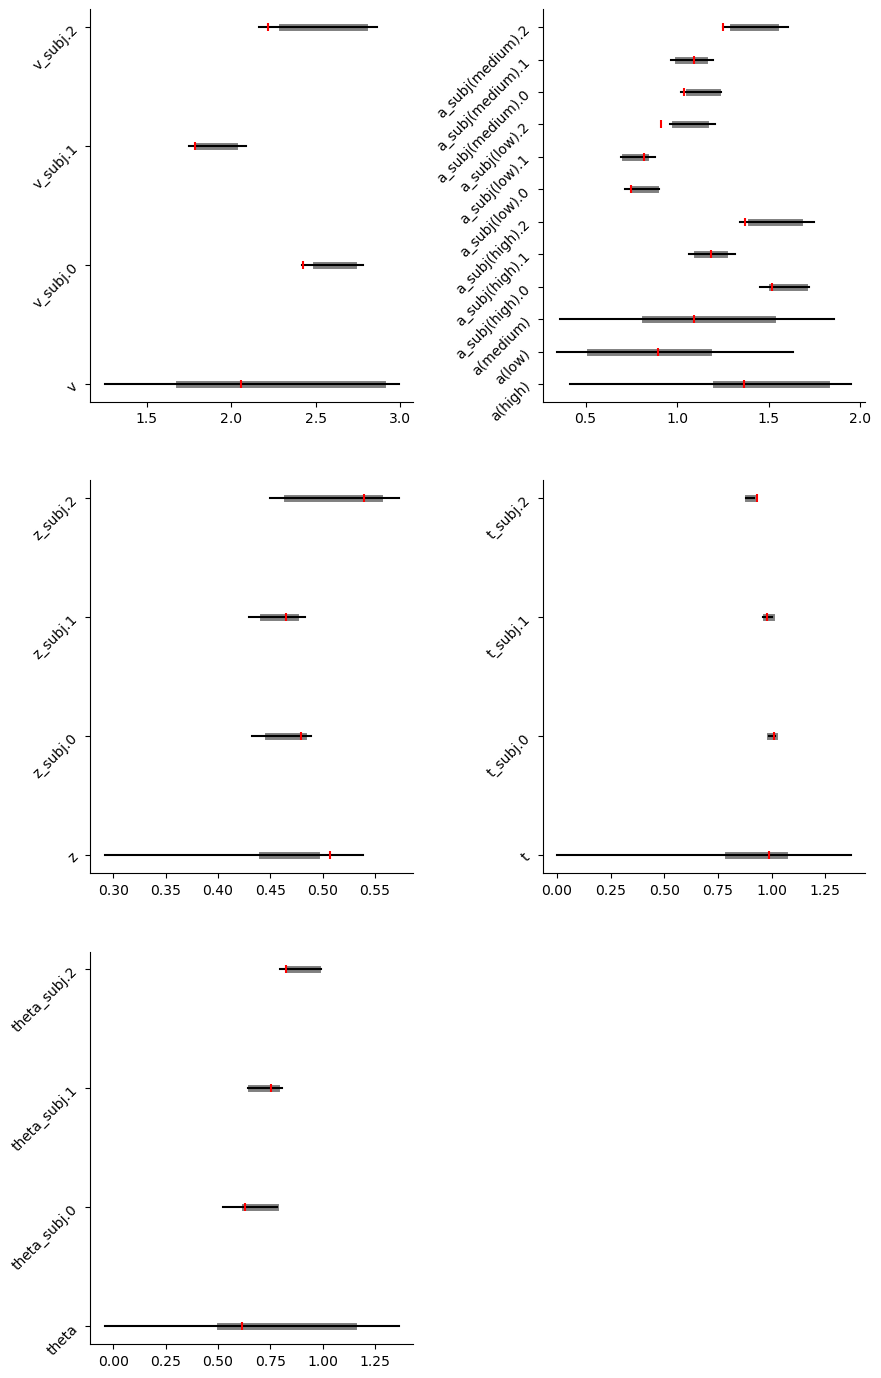

In [401]:
plt.show()

In [361]:
out = group_traces(model = hddmnn_model)
grouped_traces = make_grouped_traces(model = hddmnn_model, group_dict = out)

v
v_std
v_tau
v_subj.0
v_subj.1
v_subj.2
a
a_std
a_tau
a_subj.0
a_subj.1
a_subj.2
z_trans
z
z_std
z_tau
z_subj_trans.0
z_subj_trans.1
z_subj_trans.2
z_subj.0
z_subj.1
z_subj.2
t
t_std
t_tau
t_subj.0
t_subj.1
t_subj.2
theta
theta_std
theta_tau
theta_subj.0
theta_subj.1
theta_subj.2
wfpt.0
wfpt.1
wfpt.2


In [362]:
out

{'v': ['v', 'v_std', 'v_subj.0', 'v_subj.1', 'v_subj.2'],
 'a': ['a', 'a_std', 'a_subj.0', 'a_subj.1', 'a_subj.2'],
 'z': ['z', 'z_std', 'z_subj.0', 'z_subj.1', 'z_subj.2'],
 't': ['t', 't_std', 't_subj.0', 't_subj.1', 't_subj.2'],
 'theta': ['theta',
  'theta_std',
  'theta_subj.0',
  'theta_subj.1',
  'theta_subj.2']}

In [364]:
hddmnn_model.get_traces()

,v,v_std,v_subj.0,v_subj.1,v_subj.2,a,a_std,a_subj.0,a_subj.1,a_subj.2,...,t,t_std,t_subj.0,t_subj.1,t_subj.2,theta,theta_std,theta_subj.0,theta_subj.1,theta_subj.2
0,-1.726921,0.606570,-1.793615,-1.727513,-2.431037,0.904070,0.014078,0.914108,0.922265,0.892943,...,0.701588,0.562672,0.595696,0.658558,0.790780,0.584143,0.051682,0.594090,0.560957,0.568421
1,-1.729079,0.420386,-1.799719,-1.664760,-2.363248,0.901078,0.057408,0.919398,0.924300,0.930672,...,0.210741,0.576732,0.595545,0.657100,0.780062,0.560732,0.054441,0.581225,0.541018,0.566022
2,-2.423864,0.720038,-1.753391,-1.663511,-2.372275,0.929226,0.097011,0.910276,0.943970,0.929606,...,0.507118,0.446424,0.600616,0.657611,0.782589,0.522152,0.042965,0.590027,0.581915,0.597666
3,-2.105471,0.555768,-1.744456,-1.780615,-2.286410,0.934785,0.072767,0.909278,0.930291,0.933657,...,0.473794,0.507196,0.602724,0.661037,0.779041,0.680408,0.119227,0.588159,0.604337,0.598232
4,-1.825449,0.434632,-1.716220,-1.670215,-2.265287,0.965205,0.077266,0.909771,0.942948,0.933308,...,0.481909,0.814110,0.602322,0.661675,0.774987,0.576092,0.032490,0.581089,0.597732,0.603093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-2.290589,0.373993,-1.820672,-1.642135,-2.388931,0.890566,0.085683,0.923313,0.949909,0.921473,...,0.331603,0.576662,0.599269,0.652386,0.778234,0.588737,0.010600,0.591503,0.614629,0.590218
146,-2.191538,0.537512,-1.731682,-1.653764,-2.414081,1.001957,0.067697,0.921585,0.954460,0.912953,...,0.263634,0.251685,0.601997,0.656527,0.777897,0.604029,0.020135,0.609723,0.608222,0.613197
147,-1.945289,1.021475,-1.741914,-1.640220,-2.444541,0.931078,0.073189,0.921582,0.946970,0.909459,...,0.658729,0.122915,0.600201,0.660429,0.779708,0.607880,0.030708,0.619584,0.620103,0.598365
148,-2.755785,0.829545,-1.734933,-1.595809,-2.453481,1.006868,0.070260,0.917502,0.933491,0.915003,...,0.785589,0.167040,0.600235,0.658430,0.779807,0.612741,0.019859,0.610730,0.605785,0.591531


In [344]:
grouped_traces['v']

,v,v_std,v_subj.0,v_subj.1,v_subj.2
0,-1.726921,0.606570,-1.793615,-1.727513,-2.431037
1,-1.729079,0.420386,-1.799719,-1.664760,-2.363248
2,-2.423864,0.720038,-1.753391,-1.663511,-2.372275
3,-2.105471,0.555768,-1.744456,-1.780615,-2.286410
4,-1.825449,0.434632,-1.716220,-1.670215,-2.265287
...,...,...,...,...,...
145,-2.290589,0.373993,-1.820672,-1.642135,-2.388931
146,-2.191538,0.537512,-1.731682,-1.653764,-2.414081
147,-1.945289,1.021475,-1.741914,-1.640220,-2.444541
148,-2.755785,0.829545,-1.734933,-1.595809,-2.453481


In [27]:
from kabuki.analyze import _parents_to_random_posterior_sample
#import ipdb
# def data_processor(x = None):
#     #print(x[:, 0] * x[:, 1])
#     return x[:, 0] * x[:, 1]

plot_posterior_predictive(model = hddmnn_model, plot_func = _plot_posterior_pdf_node_nn,  
                          value_range = np.arange(-5, 5, 0.01), samples = 50,
                          **{'bin_size': 0.05,
                             'plot_likelihood_raw': True,
                             'add_posterior_mean': True,
                             'alpha': 0.05,
                             'plot_type': 'step',
                             'linewidth': 2},
                           figsize = (12, 4))

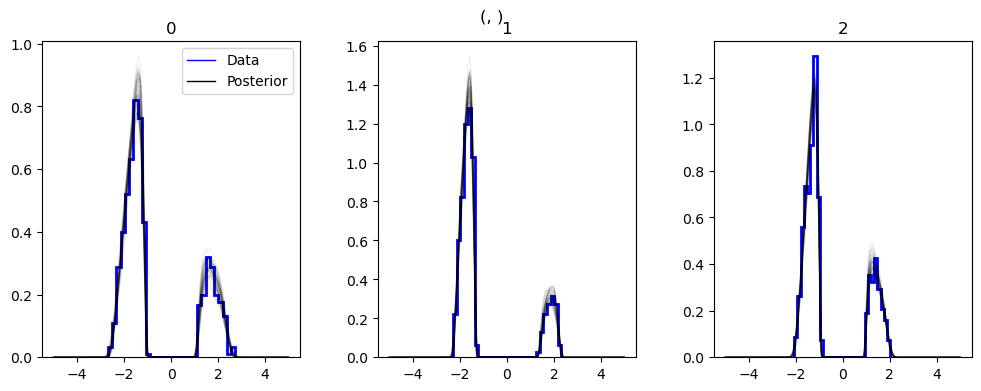

In [28]:
plt.show()

In [69]:
from kabuki.analyze import _parents_to_random_posterior_sample
#import ipdb
# def data_processor(x = None):
#     #print(x[:, 0] * x[:, 1])
#     return x[:, 0] * x[:, 1]

x = plot_posterior_predictive(model = hddmnn_model, plot_func = _plot_posterior_from_sim_n,  
                          value_range = (-5, 5), samples = 50,
                          **{'bin_size': 0.1,
                             'add_posterior_uncertainty': True,
                             'add_posterior_mean': True,
                             'alpha': 0.05,
                             'plot_type': 'step',
                             'linewidth': 1.})

flip
True
0     -1
1     -1
2      1
3     -1
4     -1
      ..
495   -1
496   -1
497   -1
498    1
499   -1
Name: response, Length: 500, dtype: int64
flip
True
0     -1
1     -1
2     -1
3     -1
4     -1
      ..
495   -1
496   -1
497   -1
498   -1
499   -1
Name: response, Length: 500, dtype: int64
flip
True
0     -1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499   -1
Name: response, Length: 500, dtype: int64


/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: Too many nodes. Consider increasing number of columns.


In [231]:
x.rt.values

array([-1.95759451, -1.64559662, -2.22259116, -1.97159433,  2.0595932 ,
        2.12159252,  1.96159446, -2.07659292,  2.35258961, -2.20659137,
       -2.02359366,  2.20059156,  2.01459384, -2.15159202,  1.79959655,
        1.86059582, -2.45658827, -2.32458973, -2.18759155, -1.94759464,
        2.07759309,  2.29059029, -1.82159626, -2.14659214, -2.10059261,
       -2.1325922 , -2.18159175,  2.35358953, -1.83659613, -2.04759336,
       -1.81159639, -1.88759542, -2.06859303, -2.17659187, -1.75059688,
        2.24559093, -2.06659317, -2.26259065, -1.997594  ,  1.93159485,
       -1.98559415, -2.24959087, -2.24959087, -1.91359508, -2.15159202,
       -1.88959539, -2.02059364, -1.72959685, -1.88659549, -1.94459474,
        1.76759684, -2.25959063,  1.87759554, -2.39458895,  2.21559119,
       -1.92059505,  2.24959087, -1.90259528, -2.22459126,  1.93159485,
       -1.64959669, -1.7955966 , -2.11359262, -2.23959088, -1.8545959 ,
       -2.21259117, -2.10159278, -1.73959684,  1.98459423, -1.66

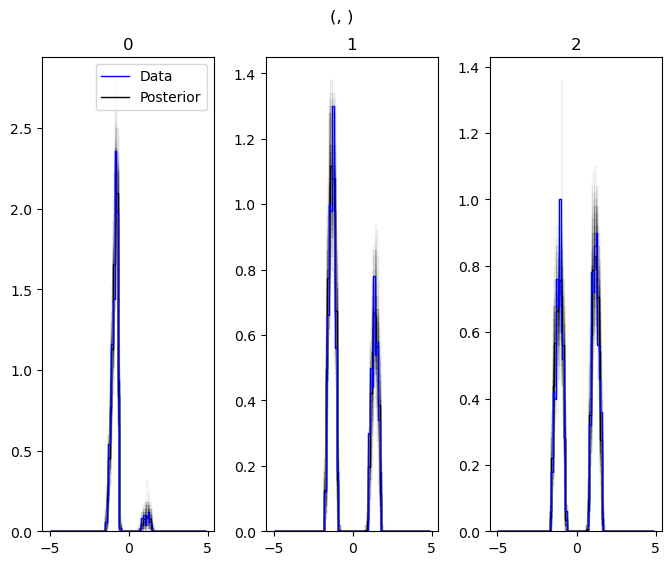

In [70]:
plt.show()

In [202]:
y = pd.concat(x)
y.rt[y.response == 0].values

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [72]:
# Metadata
nmcmc = 150
burn = 100
model = 'angle'

In [73]:
# Load one of the datasets shipping with HDDM
cav_data = hddm.load_csv(hddm.__path__[0] + '/examples/cavanagh_theta_nn.csv')

In [74]:
cav_data_tmp = cav_data[cav_data.subj_idx < 6]

In [75]:
hddmnn_model_cav = hddm.HDDMnn(cav_data_tmp,
                               model = model,
                               informative = False,
                               include = hddm.simulators.model_config[model]['hddm_include'], #is_group_model = True,
                               p_outlier = 0.05,
                               depends_on = {'v': 'stim'})

Includes supplied:  ['z', 'theta']


In [76]:
hddmnn_model_cav.sample(nmcmc, burn = burn)

 [-----------------100%-----------------] 151 of 150 complete in 47.0 sec

In [11]:
posterior_samples = hddm.utils.post_pred_gen(hddmnn_model_cav, samples = 20, add_model_parameters = True)

 [------------------105%------------------] 19 of 18 complete in 3.7 sec

In [12]:
posterior_samples

rt  response         v         a         z  \
node       sample                                                        
wfpt(LL).0 0      0   1.465787         1 -0.047956  1.488317  0.496313   
                  1  -0.719793        -1 -0.047956  1.488317  0.496313   
                  2  -1.507789        -1 -0.047956  1.488317  0.496313   
                  3   2.624815         1 -0.047956  1.488317  0.496313   
                  4  -1.260786        -1 -0.047956  1.488317  0.496313   
...                        ...       ...       ...       ...       ...   
wfpt(WW).5 19     66 -1.016028        -1  0.155025  1.149622  0.485830   
                  67  1.600039         1  0.155025  1.149622  0.485830   
                  68  1.380028         1  0.155025  1.149622  0.485830   
                  69 -0.454034        -1  0.155025  1.149622  0.485830   
                  70  0.831030         1  0.155025  1.149622  0.485830   

                             t     theta  
node       sample                         
wfpt(LL).0 0      0   0.397793  0.296188  
                  1   0.397793  0.296188  
                  2   0.397793  0.296188  
                  3   0.397793  0.296188  
                  4   0.397793  0.296188  
...                        ...       ...  
wfpt(WW).5 19     66  0.295034  0.310842  
                  67  0.295034  0.310842  
                  68  0.295034  0.310842  
                  69  0.295034  0.310842  
                  70  0.295034  0.310842  

[34600 rows x 7 columns]

In [186]:
help(hddm.simulators.simulator)

Help on function simulator in module hddm.simulators.basic_simulator:

simulator(theta, model='angle', n_samples=1000, delta_t=0.001, max_t=20, no_noise=False, bin_dim=None, bin_pointwise=False)
    Basic data simulator for the models included in HDDM.
    
    :Arguments:
        theta : list or numpy.array or panda.DataFrame
            Parameters of the simulator. If 2d array, each row is treated as a 'trial'
            and the function runs n_sample * n_trials simulations.
        model: str <default='angle'>
            Determines the model that will be simulated.
        n_samples: int <default=1000>
            Number of simulation runs (for each trial if supplied n_trials > 1)
        n_trials: int <default=1>
            Number of trials in a simulations run (this specifically addresses trial by trial parameterizations)
        delta_t: float
            Size fo timesteps in simulator (conceptually measured in seconds)
        max_t: float
            Maximum reaction the sim

In [91]:
from kabuki.analyze import _parents_to_random_posterior_sample
#import ipdb
def data_processor(x = None):
    return x[:, 0] * x[:, 1]

plot_posterior_predictive(model = hddmnn_model_cav, plot_fun = _plot_posterior_pdf_node_nn,
                          value_range = np.arange(-5, 5, 0.1), samples = 20,
                          **{'data_processor': data_processor})

[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000

[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000

/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:111: UserWarning: Too many nodes. Consider increasing number of columns.


[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000

[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000

/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:111: UserWarning: Too many nodes. Consider increasing number of columns.


[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000

/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:111: UserWarning: Too many nodes. Consider increasing number of columns.


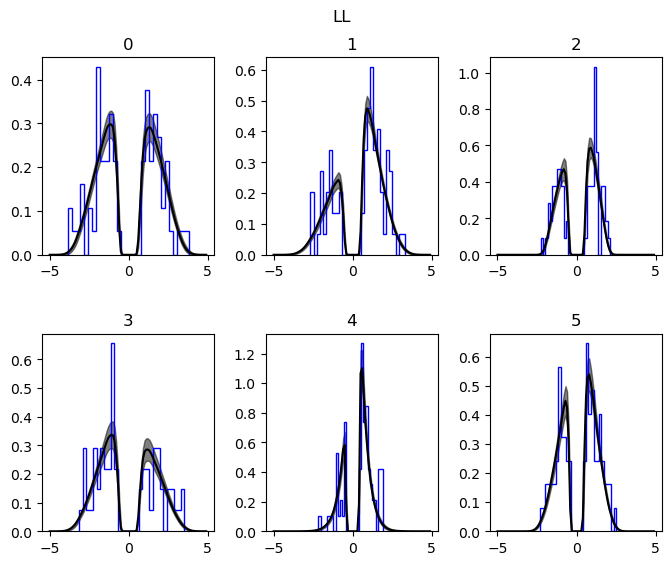

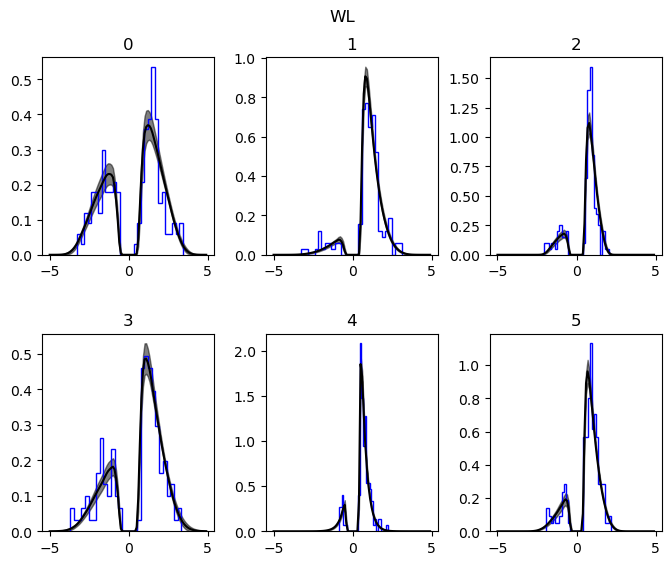

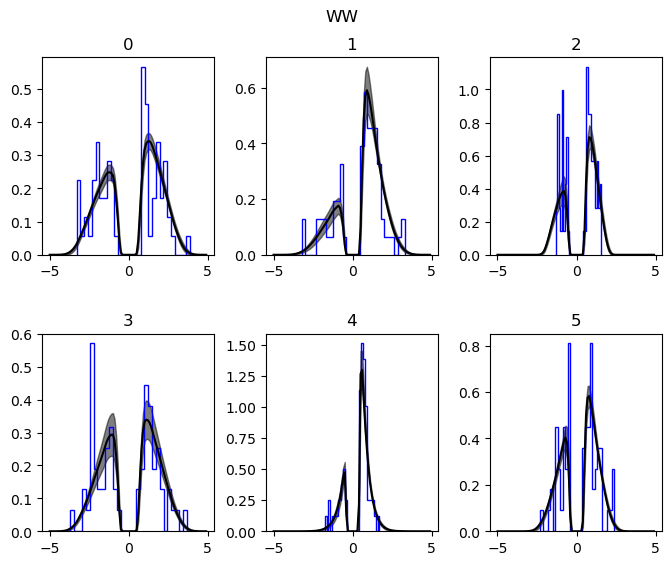

In [80]:
plt.show()

In [131]:
from kabuki.analyze import _parents_to_random_posterior_sample
#import ipdb
def data_processor(x = None):
    #print(x[:, 0] * x[:, 1])
    return x[:, 0] * x[:, 1]

plot_posterior_predictive(model = hddmnn_model_cav, plot_func = _plot_posterior_from_sim_2,  
                          value_range = (-5, 5), samples = 20,
                          **{'data_processor': data_processor, 
                             'bin_size': 0.25,
                             'drop_posterior_uncertainty': False,
                             'alpha': 0.05,
                             'plot_type': 'step',
                             'linewidth': 0.5})

{'value_range': (-5, 5), 'samples': 20, 'data_processor': <function data_processor at 0x149340200>, 'bin_size': 0.25, 'drop_posterior_uncertainty': False, 'alpha': 0.05, 'plot_type': 'step', 'linewidth': 0.5, 'model_': 'angle', 'flip_errors': True}


/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:101: UserWarning: Too many nodes. Consider increasing number of columns.


{'value_range': (-5, 5), 'samples': 20, 'data_processor': <function data_processor at 0x149340200>, 'bin_size': 0.25, 'drop_posterior_uncertainty': False, 'alpha': 0.05, 'plot_type': 'step', 'linewidth': 0.5, 'model_': 'angle', 'flip_errors': True, 'first_plot': False}


/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:101: UserWarning: Too many nodes. Consider increasing number of columns.


{'value_range': (-5, 5), 'samples': 20, 'data_processor': <function data_processor at 0x149340200>, 'bin_size': 0.25, 'drop_posterior_uncertainty': False, 'alpha': 0.05, 'plot_type': 'step', 'linewidth': 0.5, 'model_': 'angle', 'flip_errors': True, 'first_plot': False}


/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:101: UserWarning: Too many nodes. Consider increasing number of columns.


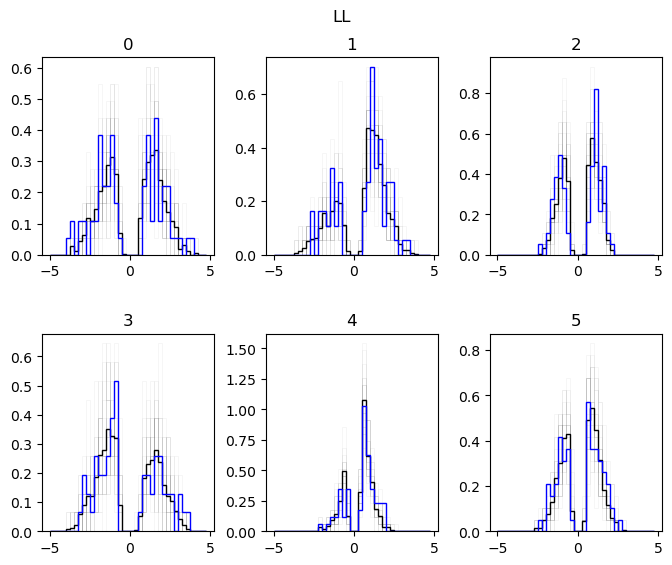

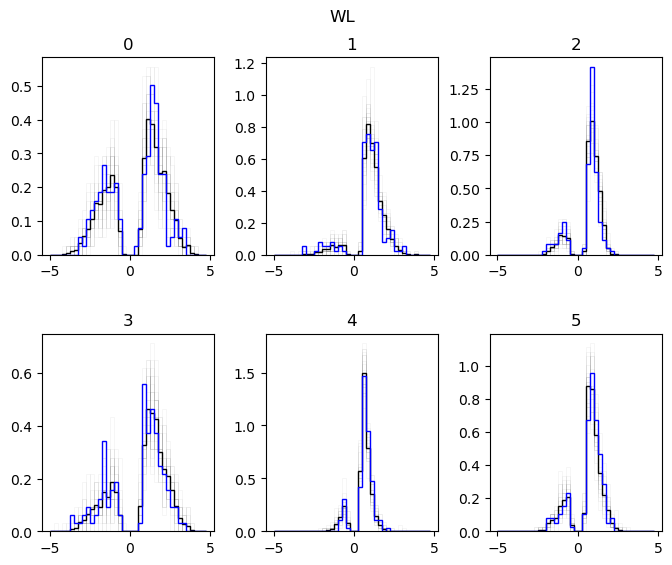

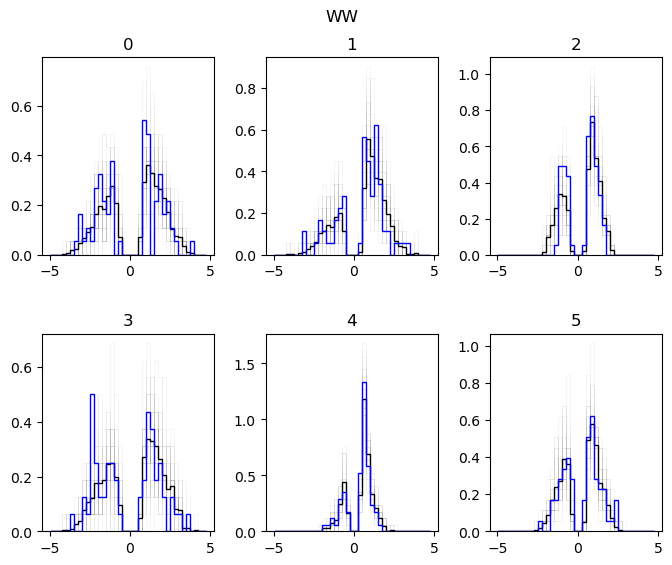

In [132]:
plt.show()

In [268]:
from kabuki.analyze import _parents_to_random_posterior_sample
#import ipdb
def data_processor(x = None):
    #print(x[:, 0] * x[:, 1])
    return x[:, 0] * x[:, 1]

plot_posterior_predictive(model = hddmnn_model_cav, plot_func = _model_plot,  
                          value_range = (-5, 5), samples = 100,
                          **{'data_processor': data_processor, 
                             'bin_size': 0.25,
                             'drop_posterior_uncertainty': False,
                             'alpha': 0.1,
                             'plot_type': 'step',
                             'linewidth': 0.5,
                             'legend_fontsize': 8,
                             'legend_shadow': True,
                             'legend_position': 'upper right'})

{'value_range': (-5, 5), 'samples': 100, 'data_processor': <function data_processor at 0x14af02b00>, 'bin_size': 0.25, 'drop_posterior_uncertainty': False, 'alpha': 0.1, 'plot_type': 'step', 'linewidth': 0.5, 'legend_fontsize': 8, 'legend_shadow': True, 'legend_position': 'upper right'}
True
False
False
False
False
False


/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:98: UserWarning: Too many nodes. Consider increasing number of columns.


{'value_range': (-5, 5), 'samples': 100, 'data_processor': <function data_processor at 0x14af02b00>, 'bin_size': 0.25, 'drop_posterior_uncertainty': False, 'alpha': 0.1, 'plot_type': 'step', 'linewidth': 0.5, 'legend_fontsize': 8, 'legend_shadow': True, 'legend_position': 'upper right', 'first_plot': False}
True
False
False
False
False
False


/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:98: UserWarning: Too many nodes. Consider increasing number of columns.


{'value_range': (-5, 5), 'samples': 100, 'data_processor': <function data_processor at 0x14af02b00>, 'bin_size': 0.25, 'drop_posterior_uncertainty': False, 'alpha': 0.1, 'plot_type': 'step', 'linewidth': 0.5, 'legend_fontsize': 8, 'legend_shadow': True, 'legend_position': 'upper right', 'first_plot': False}
True
False
False
False
False
False


/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:98: UserWarning: Too many nodes. Consider increasing number of columns.


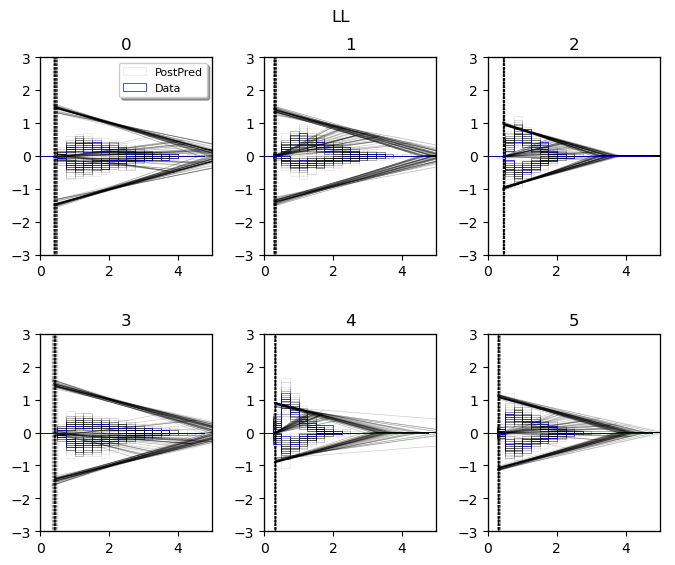

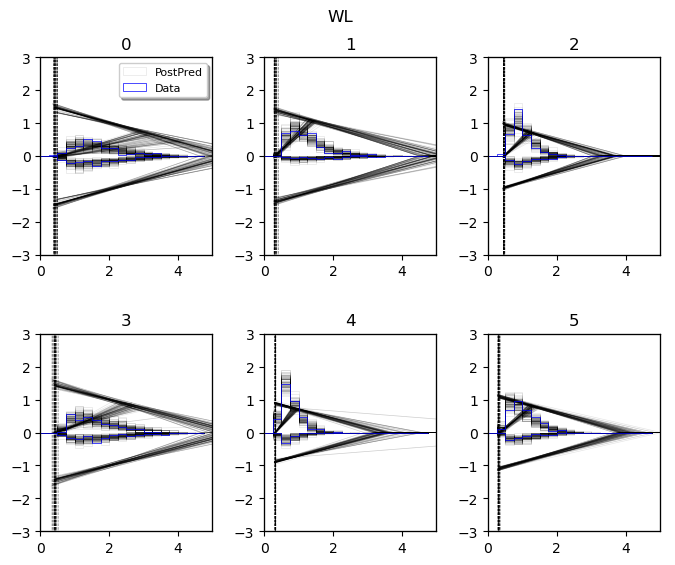

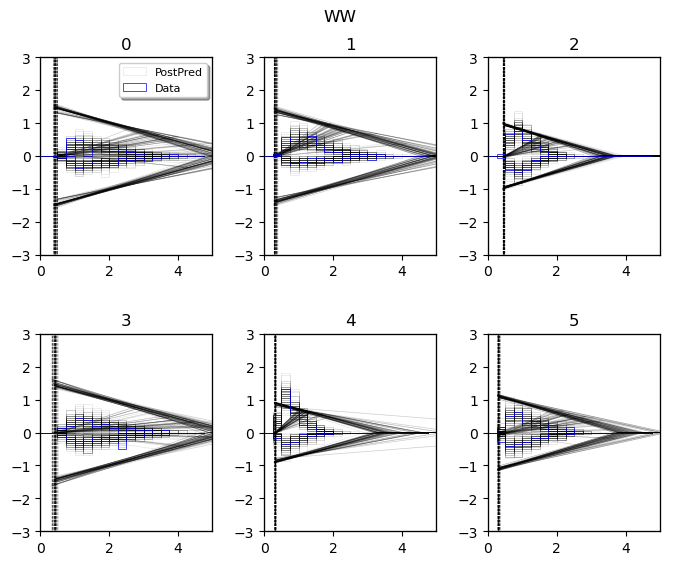

In [269]:
plt.show()

In [21]:
np.unique(np.array([tmp[0] for tmp in posterior_samples.index.values]))

array(['wfpt(LL).0', 'wfpt(LL).1', 'wfpt(LL).2', 'wfpt(LL).3',
       'wfpt(LL).4', 'wfpt(LL).5', 'wfpt(WL).0', 'wfpt(WL).1',
       'wfpt(WL).2', 'wfpt(WL).3', 'wfpt(WL).4', 'wfpt(WL).5',
       'wfpt(WW).0', 'wfpt(WW).1', 'wfpt(WW).2', 'wfpt(WW).3',
       'wfpt(WW).4', 'wfpt(WW).5'], dtype='<U10')

In [26]:
posterior_samples.loc[('wfpt(LL).0', slice(None)), ['rt']]

rt
node       sample             
wfpt(LL).0 0      0   1.465787
                  1  -0.719793
                  2  -1.507789
                  3   2.624815
                  4  -1.260786
...                        ...
           19     68  0.763895
                  69 -0.930893
                  70  1.887911
                  71  2.190925
                  72  2.064919

[1460 rows x 1 columns]

In [35]:
posterior_samples

rt  response
node       sample                       
wfpt(LL).0 0      0   1.432125         1
                  1  -1.253123        -1
                  2  -1.536130        -1
                  3   1.956149         1
                  4   2.306166         1
...                        ...       ...
wfpt(WW).5 99     66 -1.062485        -1
                  67  0.844488         1
                  68  0.815488         1
                  69  1.424493         1
                  70  0.728489         1

[173000 rows x 2 columns]

In [107]:
from kabuki.analyze import _parents_to_random_posterior_sample
#import ipdb
def data_processor(x = None):
    #print(x[:, 0] * x[:, 1])
    return x[:, 0] * x[:, 1]

plot_posterior_predictive(model = hddmnn_model_cav, 
                          value_range = np.linspace(-5,5, 100), 
                          samples = 200,
                          **{'data_processor': data_processor,
                             'plot_likelihood_raw': True,
                             'alpha': 0.05})

/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:92: UserWarning: Too many nodes. Consider increasing number of columns.
/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:92: UserWarning: Too many nodes. Consider increasing number of columns.
/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/ipykernel_launcher.py:92: UserWarning: Too many nodes. Consider increasing number of columns.


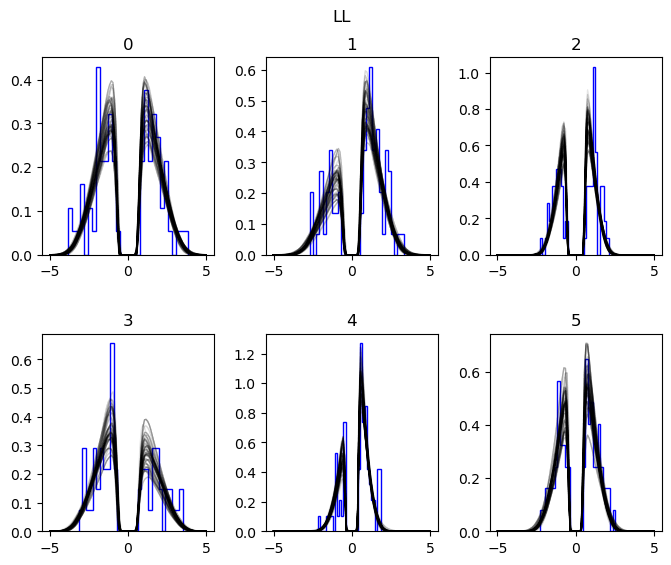

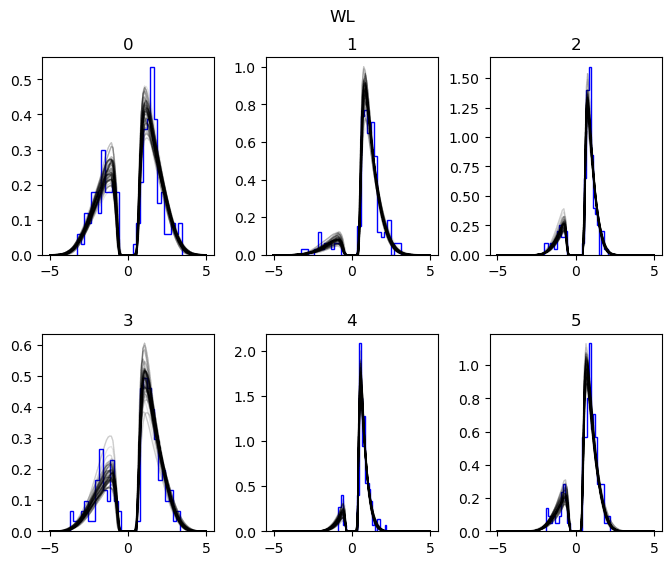

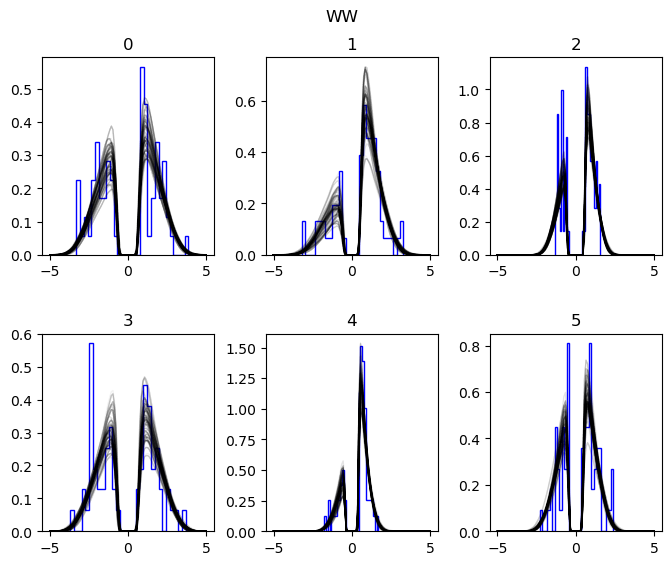

In [108]:
plt.show()

In [ ]:
hddm.plotting.caterpillar_plot(hddm_model = hddmnn_model_cav,
                               ground_truth_parameter_dict = None, #weibull_params.values[0],
                               drop_sd = False)

In [ ]:
hddm.plotting.model_plot(hddm_model = hddmnn_model_cav,
                         model_ground_truth = None,
                         n_posterior_parameters = 50,
                         cols = 3,
                         max_t = 5,
                         scale_y = 0.2,
                         scale_x = 0.5,
                         show_model = True,
                         legend_fontsize = 12)

In [36]:
mdf = pd.DataFrame(np.zeros((10, 10)))

In [39]:
mdf['a'] = 0

In [155]:
def testfun(a = 0, b = 0, **kwargs):
    print(kwargs)
    return a + b

In [157]:
testfun(**{'a': 10, 'b': 10})

{}


20

In [156]:
testfun()

{}


0